# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

This data, taken from the College Board, gives the mean SAT math and verbal scores, and the participation rate for each state and the District of Columbia for the year 2001.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

No. It is missing more detailed information like the names/gender of each student who took it, etc. The biggest issue is the participation rates. If not a lot of students took the SAT in each state then it won't give back an accurate depiction on how well each state performed becuase they are choosing from a small, potentially non-representitive sample.

##### 3. Create a data dictionary for the dataset.

sat_dicty = {}

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [329]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns


sat = '../assets/sat_scores.csv'
rows = []

with open(sat, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)
        
print rows


[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 5. Print the data

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [299]:
header = rows[0]
print header
data = rows[1:]
print data





['State', 'Rate', 'Verbal', 'Math']
[['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12'

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [166]:
state_names = [x[0] for x in data]

print state_names



['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']


##### 8. Print the types of each column

In [215]:
print [type(sat_dicty[x][0]) for x in header]




[<type 'str'>, <type 'str'>, <type 'str'>, <type 'str'>]


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [238]:
for name, col in sat_dicty.items():
    if name != 'State':
        sat_dicty[name] = [float(x) for x in col]

print [type(sat_dicty[x][0]) for x in header]

print sat_dicty




    

[<type 'str'>, <type 'float'>, <type 'float'>, <type 'float'>]
{'Math': [510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 562.0, 596.0, 550.0, 570.0, 603.0, 582.0, 599.0, 551.0, 514.0], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [323]:

new_dict =  {x[0]: x[1:] for x in data}

print new_dict


#print {data[0]:data[0]1:] for i in data}

{'WA': ['53', '527', '527'], 'DE': ['67', '501', '499'], 'DC': ['56', '482', '474'], 'WI': ['6', '584', '596'], 'WV': ['18', '527', '512'], 'HI': ['52', '485', '515'], 'FL': ['54', '498', '499'], 'WY': ['11', '547', '545'], 'NH': ['72', '520', '516'], 'NJ': ['81', '499', '513'], 'NM': ['13', '551', '542'], 'TX': ['53', '493', '499'], 'LA': ['7', '564', '562'], 'NC': ['65', '493', '499'], 'ND': ['4', '592', '599'], 'NE': ['8', '562', '568'], 'TN': ['13', '562', '553'], 'NY': ['77', '495', '505'], 'PA': ['71', '500', '499'], 'RI': ['71', '501', '499'], 'NV': ['33', '509', '515'], 'VA': ['68', '510', '501'], 'CO': ['31', '539', '542'], 'AK': ['51', '514', '510'], 'AL': ['9', '559', '554'], 'AR': ['6', '562', '550'], 'VT': ['69', '511', '506'], 'IL': ['12', '576', '589'], 'GA': ['63', '491', '489'], 'IN': ['60', '499', '501'], 'IA': ['5', '593', '603'], 'OK': ['8', '567', '561'], 'AZ': ['34', '523', '525'], 'CA': ['51', '498', '517'], 'ID': ['17', '543', '542'], 'CT': ['82', '509', '510'],

##### 11. Create a dictionary with the values for each of the numeric columns

In [302]:
sat_dicty = {}
for index, column_name in enumerate(header):
    sat_dicty[column_name] = []
    for row in data:
        sat_dicty[column_name].append(row[index])
print sat_dicty

{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', 

## Step 3: Describe the data


##### 12. Print the min and max of each column

In [248]:
print [(x, min(sat_dicty[x])) for x in header if x != 'State']

print [(x, max(sat_dicty[x])) for x in header if x != 'State']




[('Rate', 4.0), ('Verbal', 482.0), ('Math', 439.0)]
[('Rate', 82.0), ('Verbal', 593.0), ('Math', 603.0)]


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [273]:
variance = lambda array: sum([(i-np.mean(array))**2 for i in array]) / float(len(array))
standard_deviation = lambda array: np.sqrt(variance(array))

print standard_deviation(sat_dicty['Rate'])

#print [standard_deviation(sat_dicty[x]) for x in header if x != 'State']



27.0379964945


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516


(array([ 16.,   6.,   2.,   3.,   0.,   1.,   9.,   4.,   7.,   4.]),
 array([  4. ,  11.8,  19.6,  27.4,  35.2,  43. ,  50.8,  58.6,  66.4,
         74.2,  82. ]),
 <a list of 10 Patch objects>)

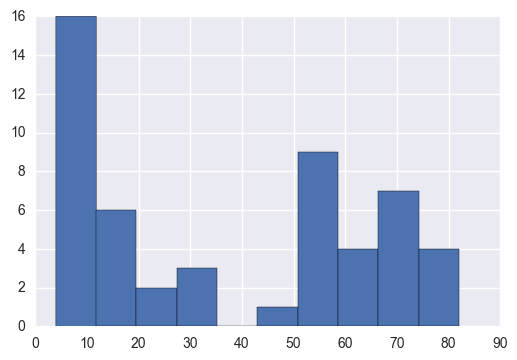

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

sat_df = pd.read_csv('../assets/sat_scores.csv')
print sat_df.head()

plt.hist(sat_df['Rate'])

##### 15. Plot the Math distribution

(array([  1.,   0.,   2.,  10.,  13.,   3.,   9.,   5.,   4.,   5.]),
 array([ 439. ,  455.4,  471.8,  488.2,  504.6,  521. ,  537.4,  553.8,
         570.2,  586.6,  603. ]),
 <a list of 10 Patch objects>)

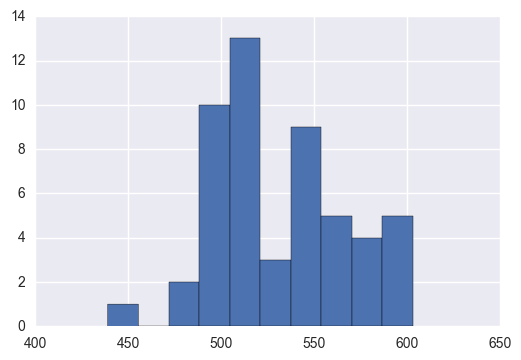

In [313]:
plt.hist(sat_df['Math'])

##### 16. Plot the Verbal distribution

(array([ 6.,  8.,  9.,  3.,  3.,  4.,  3.,  7.,  6.,  3.]),
 array([ 482. ,  493.1,  504.2,  515.3,  526.4,  537.5,  548.6,  559.7,
         570.8,  581.9,  593. ]),
 <a list of 10 Patch objects>)

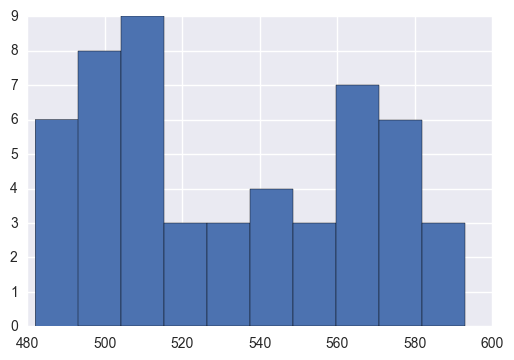

In [314]:
plt.hist(sat_df['Verbal'])

##### 17. What is the typical assumption for data distribution?

In [281]:
print("Normal Distribution is the typical assumption")

Normal Distribution is the typical assumption


##### 18. Does that distribution hold true for our data?

Not for most as they aren't bell curved. The math scores are the most normal as noted below


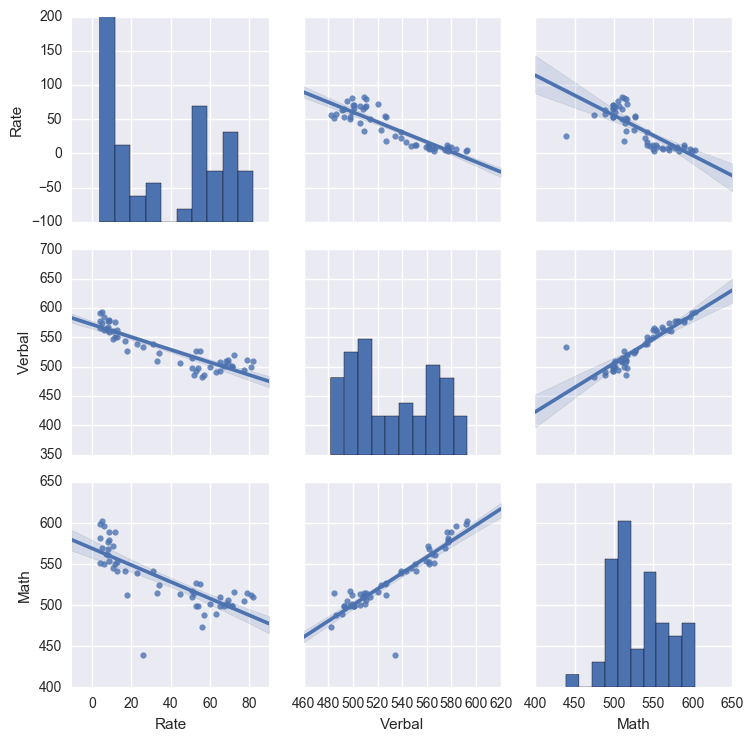

In [285]:
sns.pairplot(sat_df,kind = 'reg')
print("Not for most as they aren't bell curved. The math scores are the most normal as noted below")

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

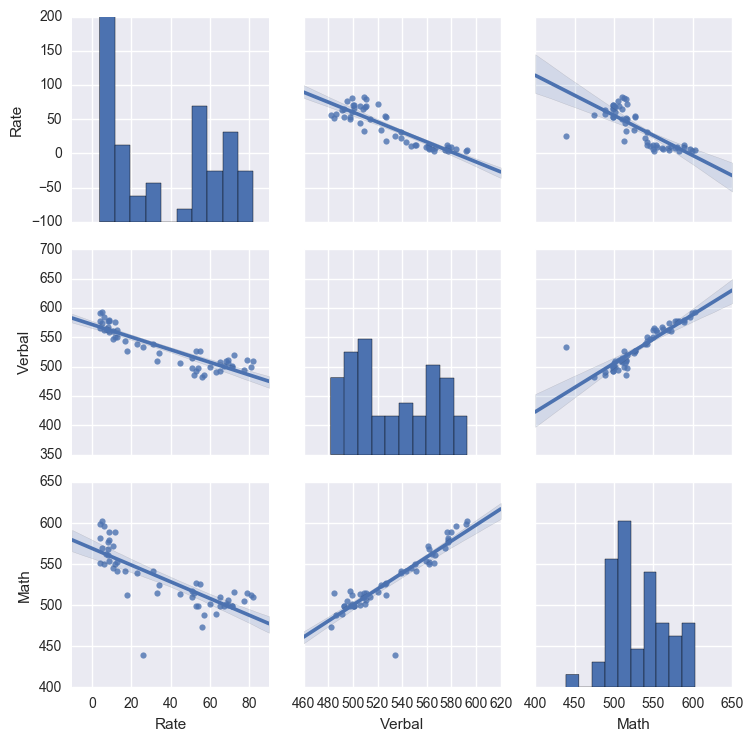

In [288]:
sns.pairplot(sat_df,kind = 'reg')


##### 20. Are there any interesting relationships to note?

In [289]:
print("As participation increases, the average math/verbal scores decrease. This may be due to a skewed sample set in the lower rate states as those students taking the test may of been the smartest in their class and by not including the normal students their math/verbal scores seem higher.")

As participation increases, the average math/verbal scores decrease. This may be due to a skewed sample set in the lower rate states as those students taking the test may of been the smartest in their class and by not including the normal students their math/verbal scores seem higher.


##### 21. Create box plots for each variable. 

{'boxes': [<matplotlib.lines.Line2D at 0x11f670890>],
 'caps': [<matplotlib.lines.Line2D at 0x11f67f710>,
 'fliers': [<matplotlib.lines.Line2D at 0x11f68aa10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11f68a3d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11f6709d0>,
  <matplotlib.lines.Line2D at 0x11f67f0d0>]}

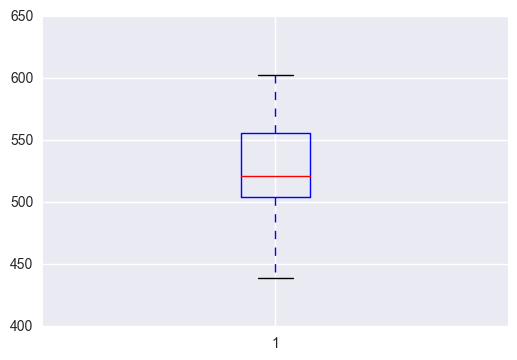

In [297]:
plt.boxplot(sat_df['Math'])

{'boxes': [<matplotlib.lines.Line2D at 0x11f7e1c10>],
 'caps': [<matplotlib.lines.Line2D at 0x11f7efa90>,
 'fliers': [<matplotlib.lines.Line2D at 0x11f7fcd90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11f7fc750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11f7e1d50>,
  <matplotlib.lines.Line2D at 0x11f7ef450>]}

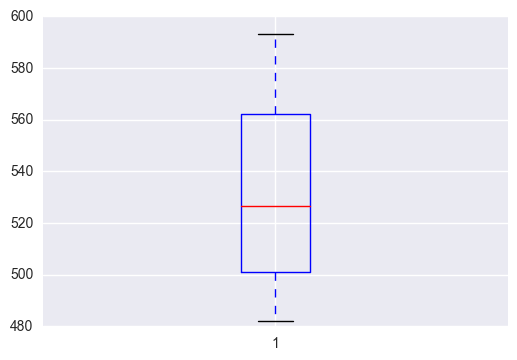

In [298]:
plt.boxplot(sat_df['Verbal'])

{'boxes': [<matplotlib.lines.Line2D at 0x11f4ee550>],
 'caps': [<matplotlib.lines.Line2D at 0x11f4fc3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11f5086d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11f508090>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11f4ee690>,
  <matplotlib.lines.Line2D at 0x11f4eed50>]}

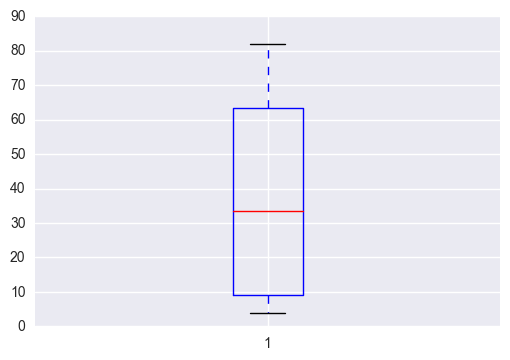

In [296]:
plt.boxplot(sat_df['Rate'])

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

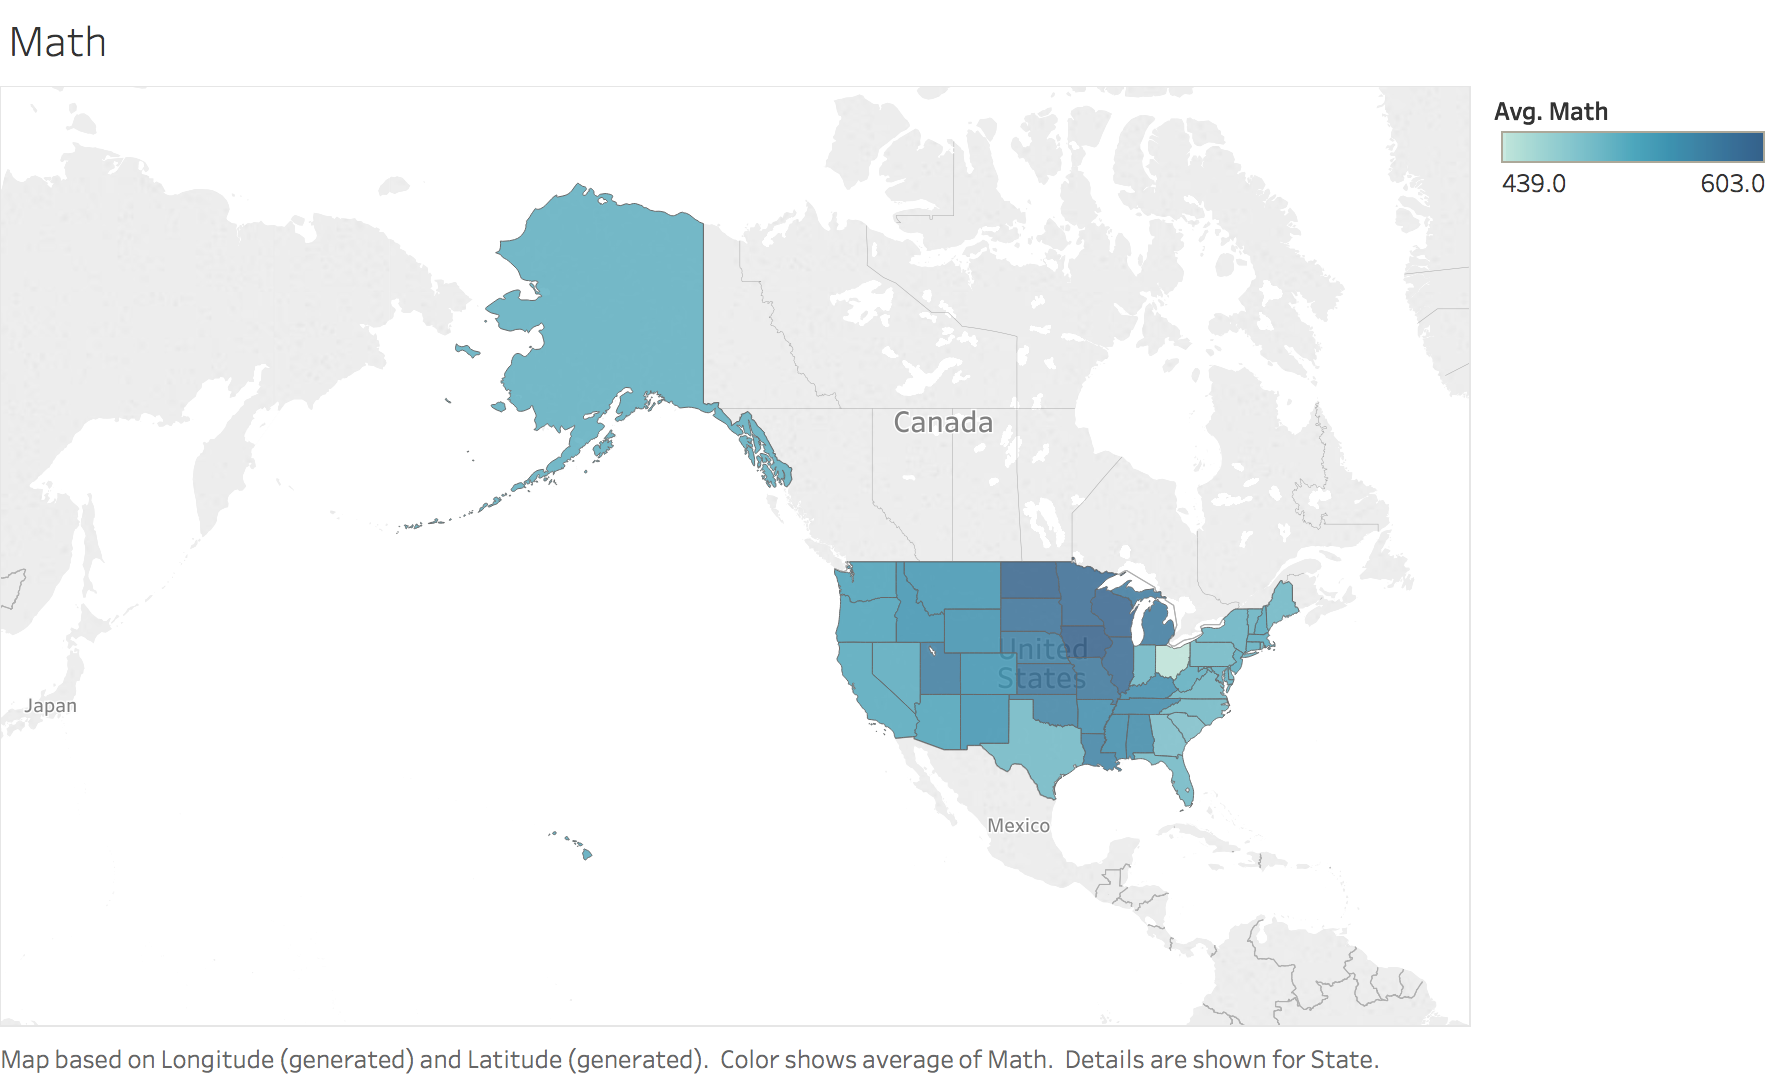

In [330]:
from IPython.display import Image
Image('../tableau_images.png')